In [84]:
import joblib
import warnings
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split


In [85]:
filename = './datasets/Training.csv'
data = read_csv(filename)
data.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS


In [86]:
# Feature selection
X = data.drop(columns=['prognosis'])
y = data['prognosis']
accuracies = {}

In [87]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [88]:
X_train.shape

(244, 134)

In [89]:
X_test.shape

(62, 134)

In [90]:
# Feature selection
list_a = ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feet', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dyschromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'fluid_overload.1', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', 'irritability', 'irritation_in_anus', 'itching', 'joint_pain', 'knee_pain', 'lack_of_concentration', 'lethargy', 'loss_of_appetite', 'loss_of_balance', 'loss_of_smell', 'loss_of_taste', 'malaise', 'mild_fever', 'mood_swings', 'movement_stiffness', 'mucoid_sputum', 'muscle_pain', 'muscle_wasting', 'muscle_weakness', 'nausea', 'neck_pain', 'nodal_skin_eruptions', 'obesity', 'pain_behind_the_eyes', 'pain_during_bowel_movements', 'pain_in_anal_region', 'painful_walking', 'palpitations', 'passage_of_gases', 'patches_in_throat', 'phlegm', 'polyuria', 'prominent_veins_on_calf', 'puffy_face_and_eyes', 'pus_filled_pimples', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'red_sore_around_nose', 'red_spots_over_body', 'redness_of_eyes', 'restlessness', 'runny_nose', 'rusty_sputum', 'scurrying', 'shivering', 'silver_like_dusting', 'sinus_pressure', 'skin_peeling', 'skin_rash', 'slurred_speech', 'small_dents_in_nails', 'spinning_movements', 'spotting_urination', 'stiff_neck', 'stomach_bleeding', 'stomach_pain', 'sunken_eyes', 'sweating', 'swelled_lymph_nodes', 'swelling_joints', 'swelling_of_stomach', 'swollen_blood_vessels', 'swollen_extremities', 'swollen_legs', 'throat_irritation', 'tiredness', 'toxic_look_(typhus)', 'ulcers_on_tongue', 'unsteadiness', 'visual_disturbances', 'vomiting', 'watering_from_eyes', 'weakness_in_limbs', 'weakness_of_one_body_side', 'weight_gain', 'weight_loss', 'yellow_crust_ooze', 'yellow_urine', 'yellowing_of_eyes', 'yellowish_skin']

In [91]:
# Loop to convert all symptoms into 0's
list_c = [] # Empty list to store diasese sympotms in 0's and 1's
for x in range(0,len(list_a)):
    list_c.append(0)

In [92]:
list_b = ['fever', 'chills', 'headache', 'nausea', 'vomiting', 'diarrhea','muscle pain', 'tiredness', 'sweating']

In [93]:
# For all matched specific disease sympotms in general put 1 and unmatched put 0 
for z in range(0,len(list_a)):
	for k in list_b:
		if(k==list_a[z]):
			list_c[z]=1

In [94]:
test2=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [95]:
test2 = np.array(test2)
print(test2.shape)
test2 = np.array(test2).reshape(1,-1)
print(test2.shape)

(134,)
(1, 134)


In [96]:
test = list_c
test = np.array(test)
print(test.shape)
test = np.array(test).reshape(1,-1)
print(test.shape)

(134,)
(1, 134)


### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

Random Forest Accuracy: 0.9516129032258065


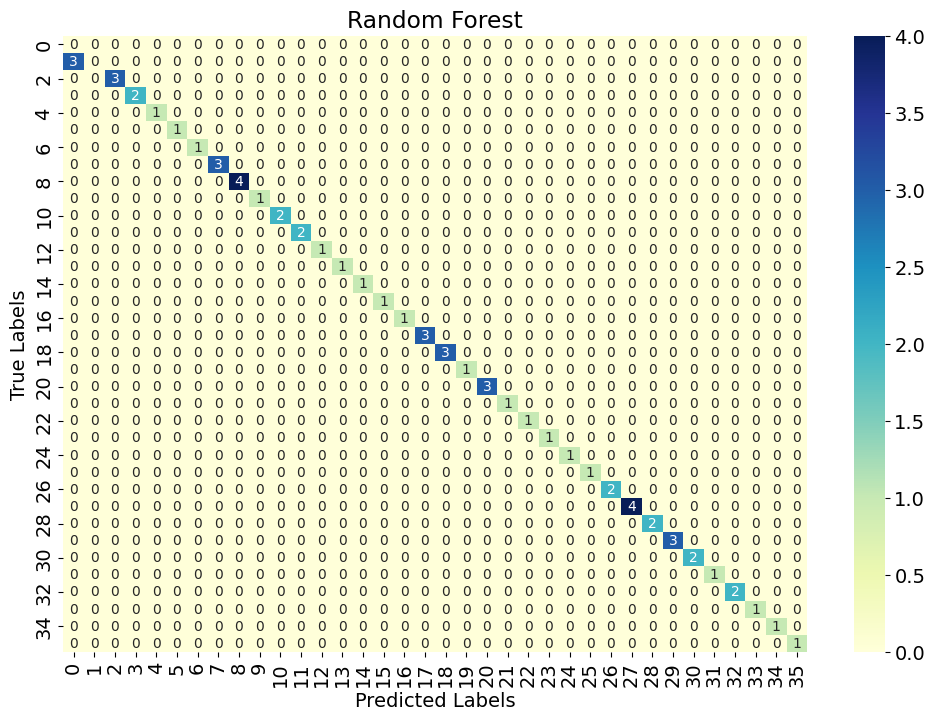

In [98]:
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report
y_pred_rf = rf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracies['random_forest'] = {
    'accuracy': accuracy_rf,
    'precision': report_rf['weighted avg']['precision'],
    'recall': report_rf['weighted avg']['recall'],
    'f1-score': report_rf['weighted avg']['f1-score']
}
print("Random Forest Accuracy:", accuracy_rf)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams

cmatrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('Random Forest')
ax.set_xlabel('Predicted Labels')  
ax.set_ylabel('True Labels')       
plt.show()

In [99]:
# Dumping the model
joblib.dump(rf, 'model/random_forest.pkl')
# Loading the model
rf = joblib.load('model/random_forest.pkl')

In [100]:
warnings.filterwarnings('ignore')
test = list_c
test = np.array(test)
test = np.array(test).reshape(1,-1)
prediction = rf.predict(test)
print(prediction[0])

prediction = rf.predict(X_test)
print(prediction[0:10])

Malaria
['Psoriasis' 'Common Cold' 'Peptic ulcer disease' 'Jaundice' 'Hepatitis E'
 'Allergy' 'Migraine' 'Dimorphic hemorrhoids(piles)' 'Psoriasis'
 'Paroxysmal Positional Vertigo']


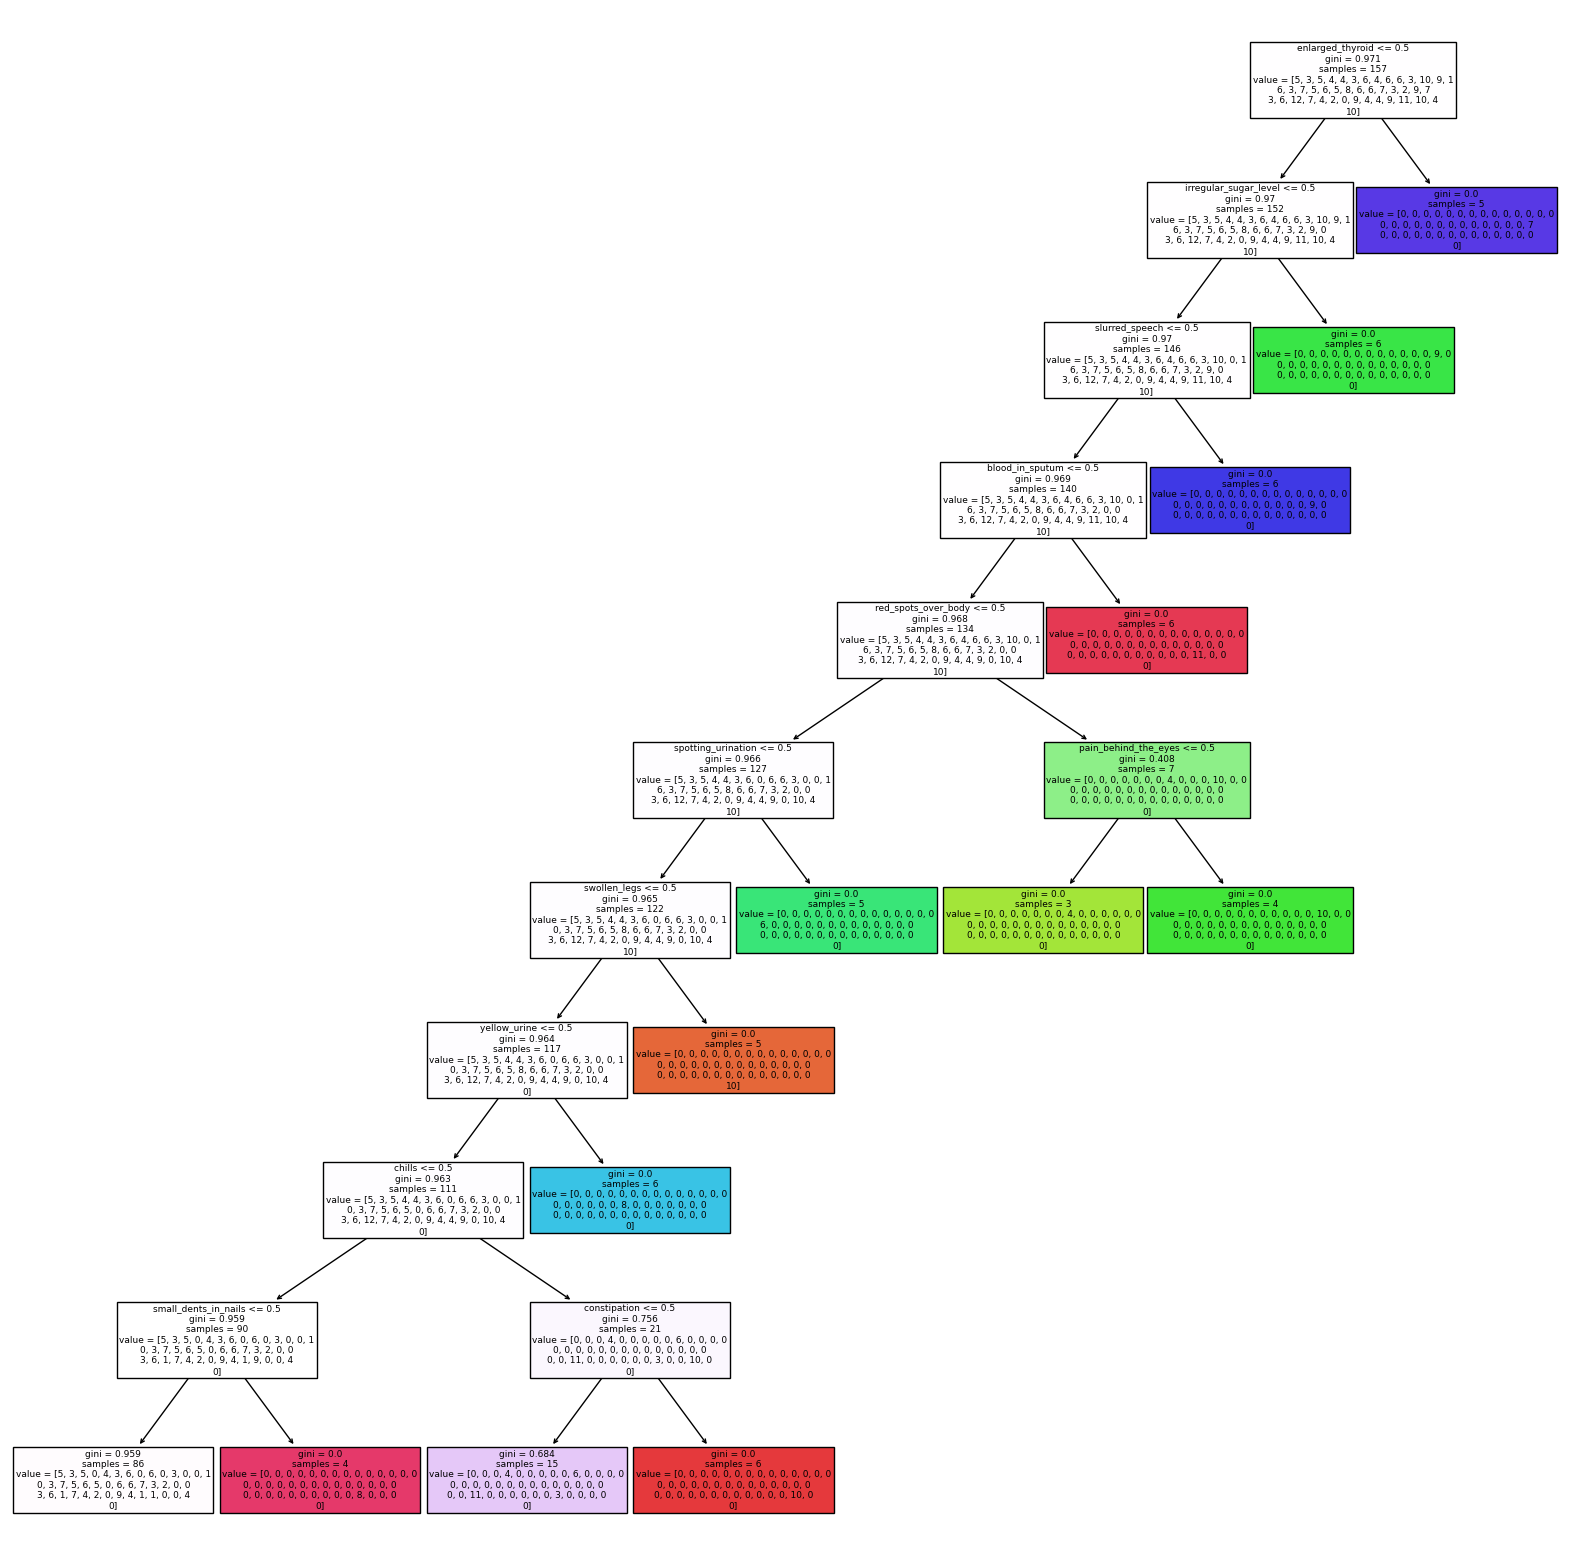

In [101]:

# Visualizing a single decision tree
import dtreeviz
from sklearn import tree
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

### Logistic Regression

In [102]:
# Fitting Model
#from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42)

Logistic Regression Accuracy: 0.9032258064516129


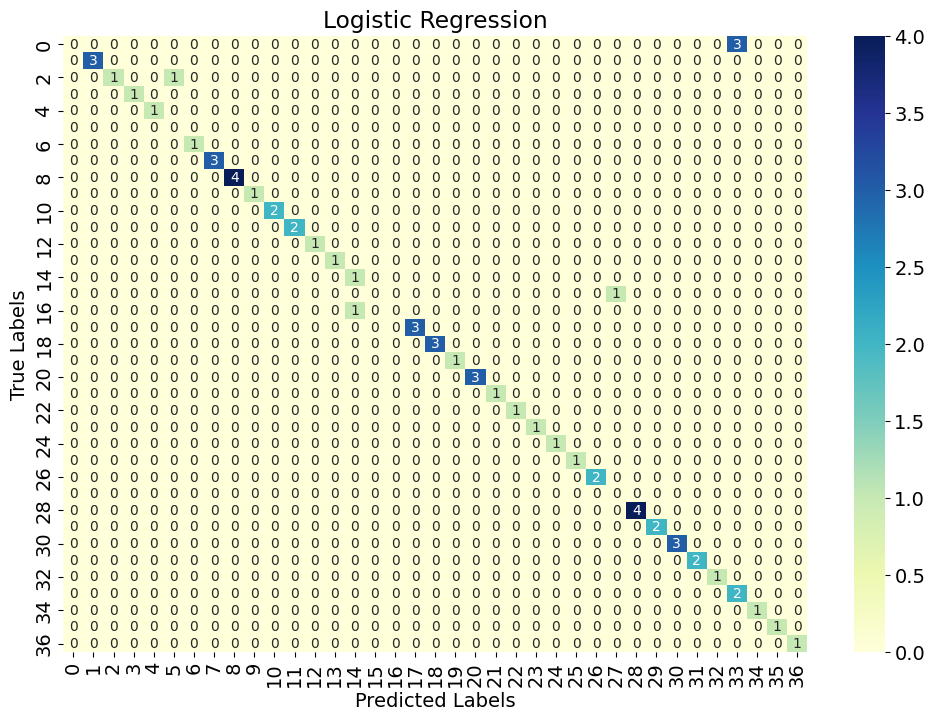

In [103]:
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
y_pred_logreg = logreg.predict(X_test)
report_lr = classification_report(y_test, y_pred_logreg, output_dict=True)
accuracy_lr = accuracy_score(y_test, y_pred_logreg)
accuracies['logistic_regression'] = {
    'accuracy': accuracy_lr,
    'precision': report_lr['weighted avg']['precision'],
    'recall': report_lr['weighted avg']['recall'],
    'f1-score': report_lr['weighted avg']['f1-score']
}
print("Logistic Regression Accuracy:", accuracy_lr)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('Logistic Regression')
ax.set_xlabel('Predicted Labels')  
ax.set_ylabel('True Labels')       
plt.show()

In [104]:
# Dumping the model
joblib.dump(logreg, 'model/logistic_regression.pkl')
# Loading the model
dt = joblib.load('model/logistic_regression.pkl')

In [105]:
warnings.filterwarnings('ignore')
prediction = dt.predict(test)
print(prediction[0])

Malaria


### Decision Tree

In [106]:
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'random_state': [0, 10, 41, 42, 100]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_dt = DecisionTreeClassifier(max_depth=101,random_state=101)
best_dt.fit(X_train, y_train)

dt.fit(X_train, y_train)
best_dt.fit(X_train, y_train)

Best Parameters: {'max_depth': 35, 'random_state': 41}


DecisionTreeClassifier(max_depth=101, random_state=101)

Decision Tree Accuracy: 0.6612903225806451


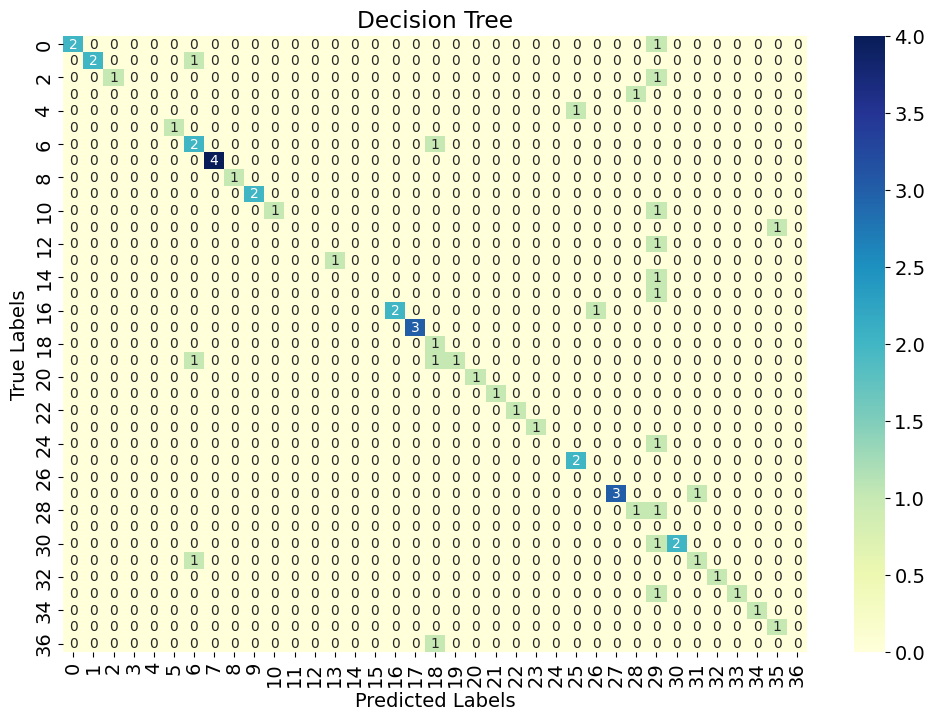

In [107]:
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
y_pred_dt = best_dt.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracies['decision_tree'] = {
    'accuracy': accuracy_dt,
    'precision': report_dt['weighted avg']['precision'],
    'recall': report_dt['weighted avg']['recall'],
    'f1-score': report_dt['weighted avg']['f1-score']
}
print("Decision Tree Accuracy:", accuracy_dt)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('Decision Tree')
ax.set_xlabel('Predicted Labels')  
ax.set_ylabel('True Labels')       
plt.show()

In [108]:
# Dumping the model
joblib.dump(best_dt, 'model/decision_tree.pkl')
# Loading the model
best_dt = joblib.load('model/decision_tree.pkl')

In [109]:
warnings.filterwarnings('ignore')
prediction = best_dt.predict(test)
print(prediction[0])

Paroxysmal Positional Vertigo


#### KNN

KNN Accuracy: 0.9516129032258065


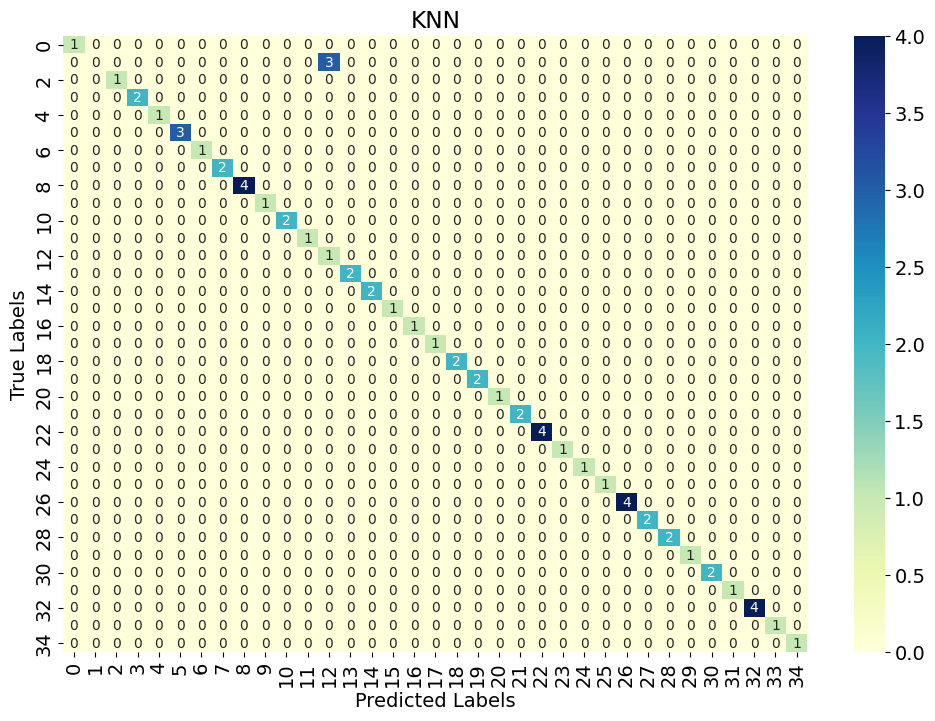

In [110]:
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
accuracies['knn'] = {
    'accuracy': accuracy_knn,
    'precision': report_knn['weighted avg']['precision'],
    'recall': report_knn['weighted avg']['recall'],
    'f1-score': report_knn['weighted avg']['f1-score']
}
print("KNN Accuracy:", accuracy_knn)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix_knn, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('KNN')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()


In [111]:
joblib.dump(knn_classifier, 'model/knn.pkl')
# Loading the model
knn = joblib.load('model/knn.pkl')

In [112]:
warnings.filterwarnings('ignore')
prediction = knn.predict(test)
print(prediction[0])

Malaria


### Gradient Boosting

Gradient Boosting Accuracy: 0.7741935483870968


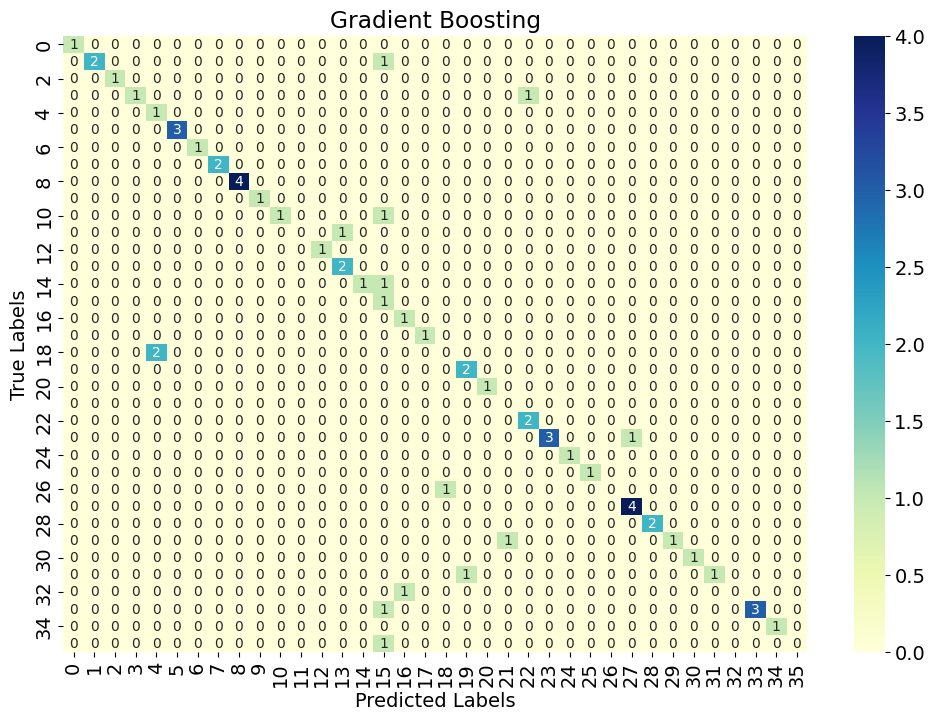

In [113]:
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report
y_pred_gb = gb.predict(X_test)
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracies['gradient_boosting'] = {
    'accuracy': accuracy_gb,
    'precision': report_gb['weighted avg']['precision'],
    'recall': report_gb['weighted avg']['recall'],
    'f1-score': report_gb['weighted avg']['f1-score']
}
print("Gradient Boosting Accuracy:", accuracy_gb)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix_gb, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('Gradient Boosting')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()


In [114]:
joblib.dump(gb, 'model/gradient_boosting.pkl')

['model/gradient_boosting.pkl']

### SVC

SVC Accuracy: 1.0


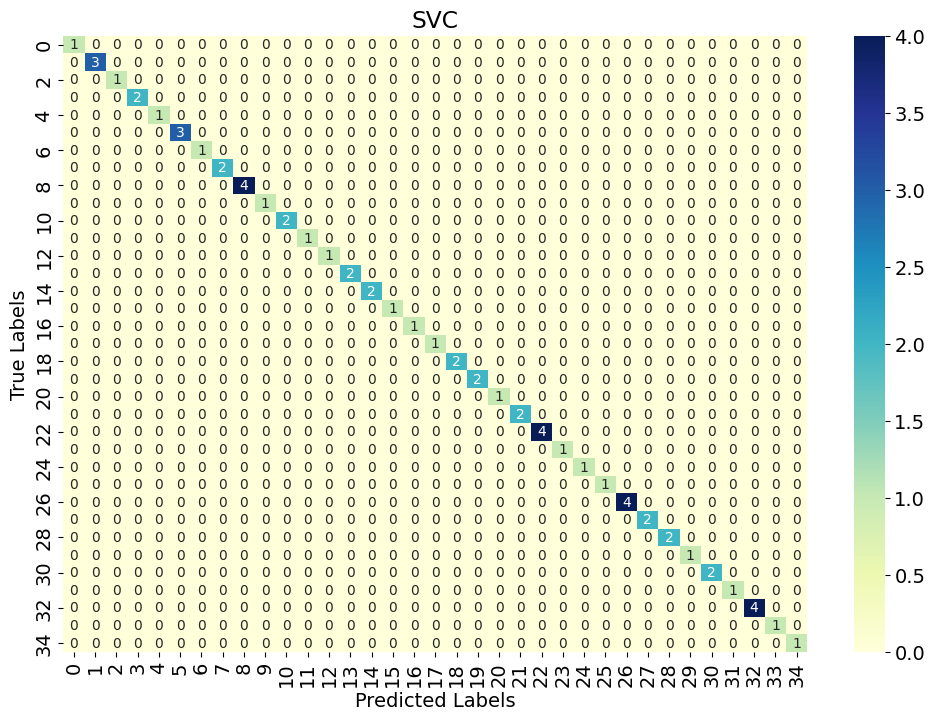

In [115]:
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report
y_pred_svc = svc.predict(X_test)
report_svc = classification_report(y_test, y_pred_svc, output_dict=True)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
# accuracies['svc'] = {
#     'accuracy': accuracy_svc,
#     'precision': report_svc['weighted avg']['precision'],
#     'recall': report_svc['weighted avg']['recall'],
#     'f1-score': report_svc['weighted avg']['f1-score']
# }

print("SVC Accuracy:", accuracy_svc)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix_svc, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('SVC')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()


### Multinomial Naive Bayes

Multinomial Naive Bayes Accuracy: 0.967741935483871


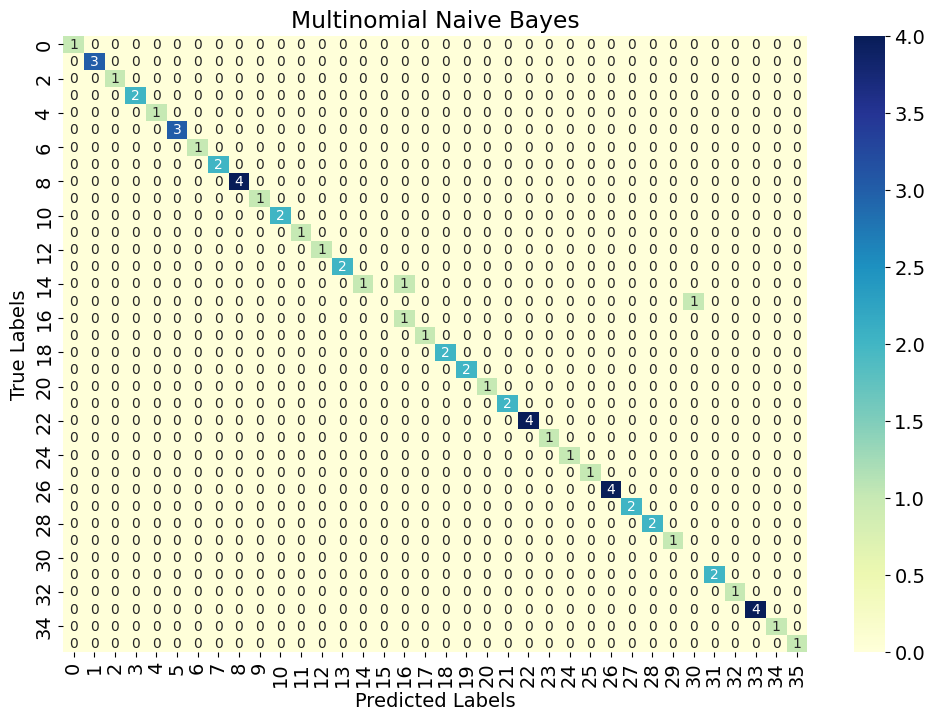

In [116]:
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracies['naive_bayes'] = {
    'accuracy': accuracy_nb,
    'precision': report_nb['weighted avg']['precision'],
    'recall': report_nb['weighted avg']['recall'],
    'f1-score': report_nb['weighted avg']['f1-score']
}

print("Multinomial Naive Bayes Accuracy:", accuracy_nb)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix_nb, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('Multinomial Naive Bayes')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()


In [117]:
joblib.dump(nb, 'model/mnb.pkl')

['model/mnb.pkl']

#### Comparisons

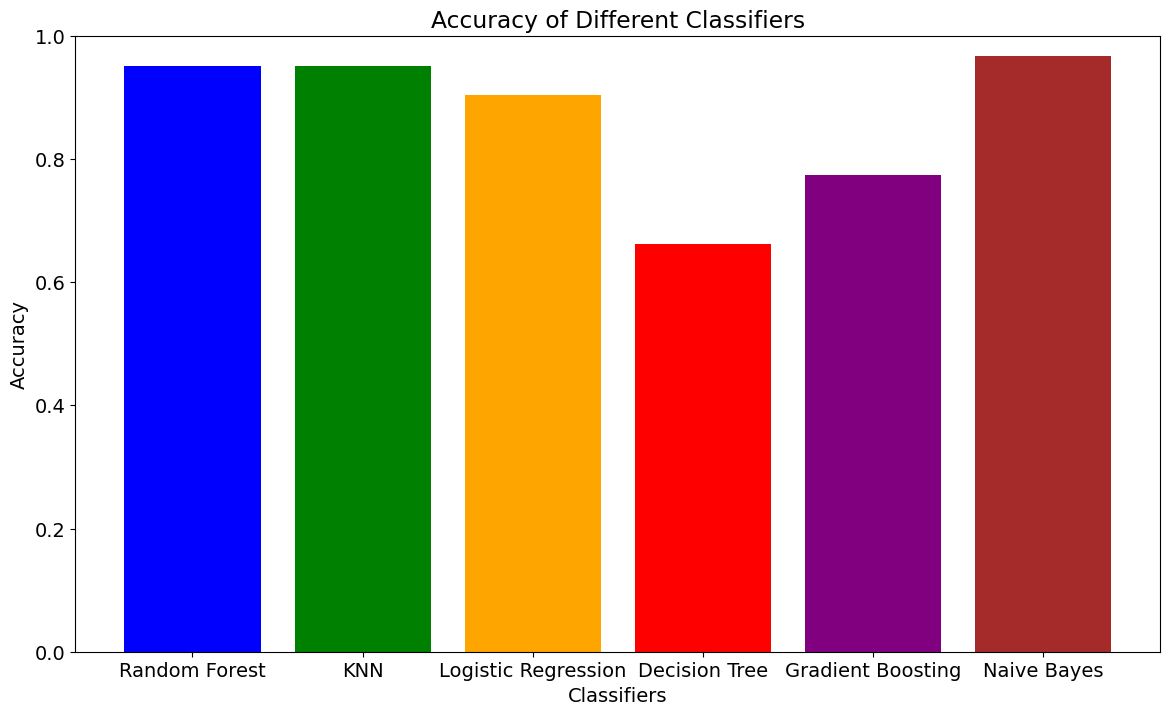

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Create a histogram
classifiers = ['Random Forest', 'KNN', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Naive Bayes']
accuracy = [accuracies['random_forest']['accuracy'], accuracies['knn']['accuracy'],accuracies['logistic_regression']['accuracy'] , accuracies['decision_tree']['accuracy'], accuracies['gradient_boosting']['accuracy'], accuracies['naive_bayes']['accuracy']]
plt.figure(figsize=(14, 8))
plt.bar(classifiers, accuracy, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0.0, 1.0) 
plt.show()


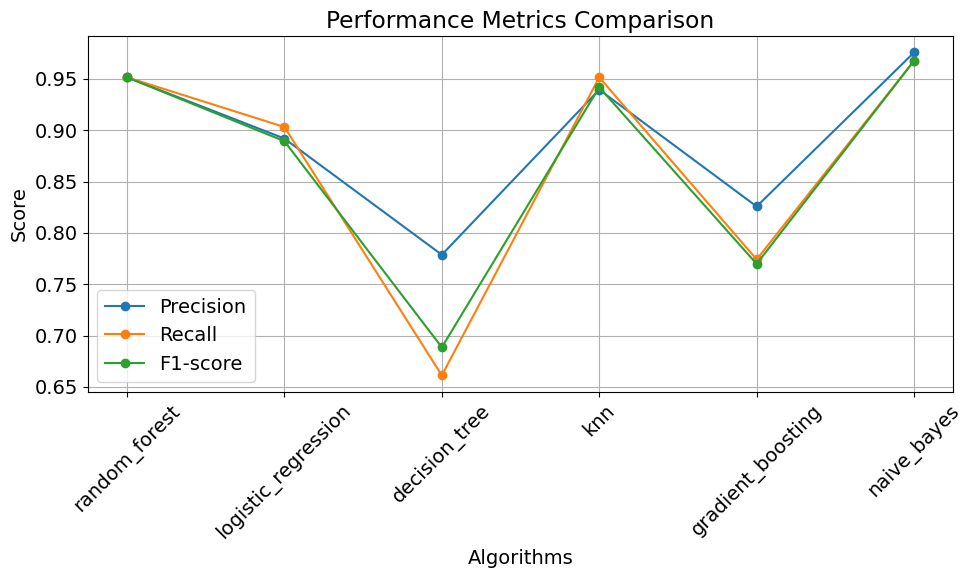

In [119]:
import numpy as np
import matplotlib.pyplot as plt

algorithms = list(accuracies.keys())
metrics = ['precision', 'recall', 'f1-score']

plt.figure(figsize=(10, 6))

for metric in metrics:
    scores = [accuracies[algo][metric] for algo in algorithms]
    plt.plot(algorithms, scores, marker='o', label=metric.capitalize())

plt.title('Performance Metrics Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


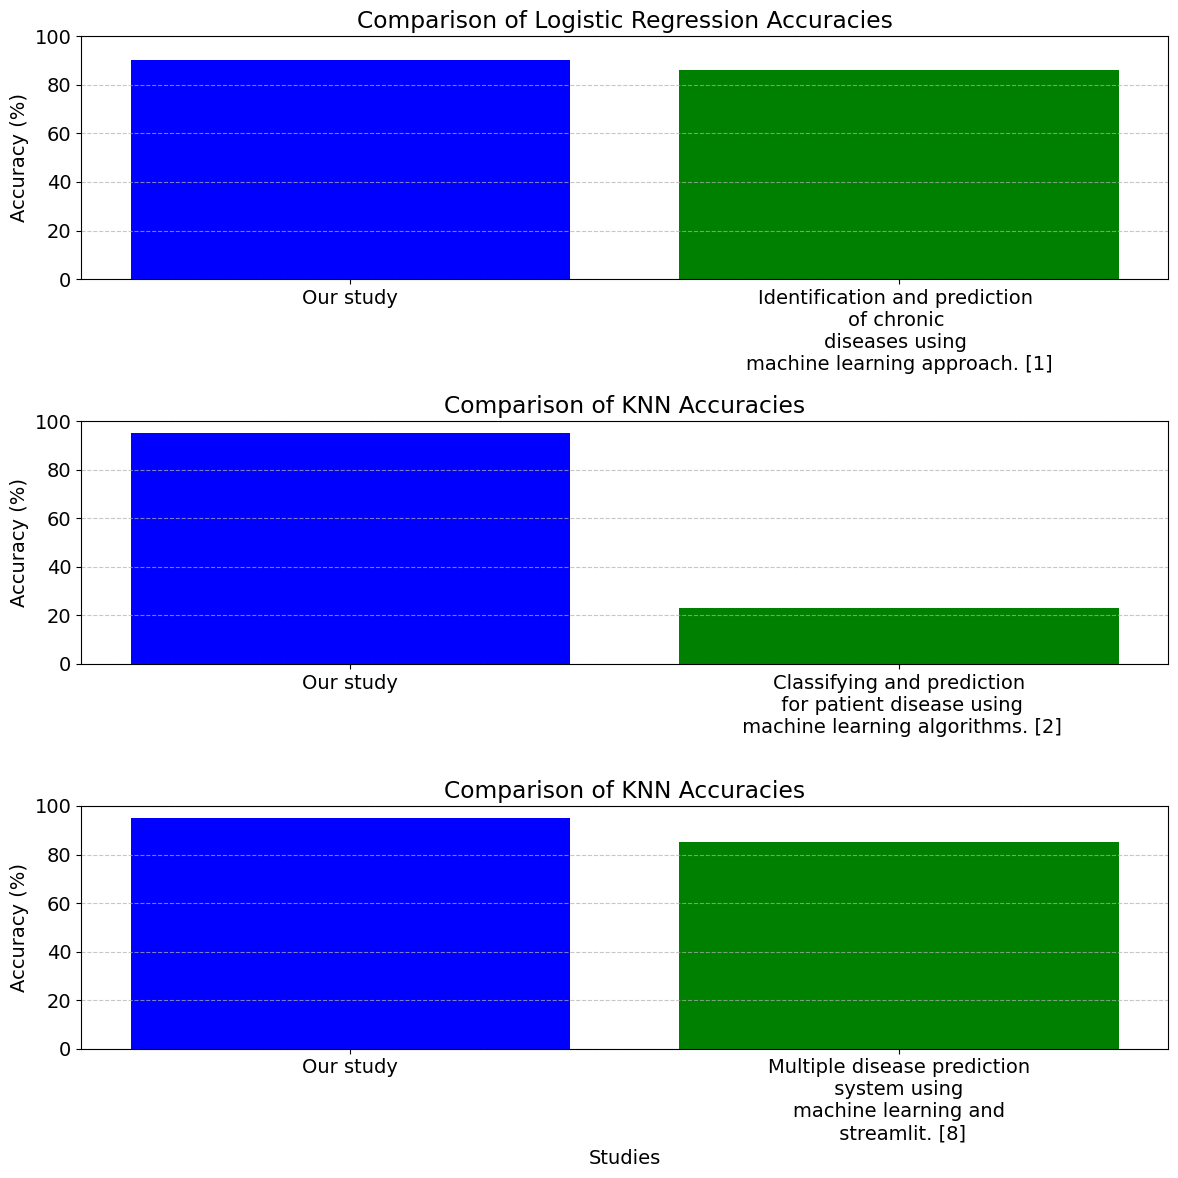

In [120]:
import matplotlib.pyplot as plt

# Define accuracies for logistic regression, KNN, and papers
lr_acc = accuracies['logistic_regression']['accuracy'] * 100
knn_acc = accuracies['knn']['accuracy'] * 100
paper1_acc = 86
paper2_acc = 23
paper8_acc = 85

plt.figure(figsize=(12, 12))

# Plot bar graphs for Logistic Regression and papers
plt.subplot(3, 1, 1)
plt.bar(['Our study', "Identification and prediction \nof chronic \ndiseases using \nmachine learning approach. [1]"], [lr_acc, paper1_acc], color=['blue', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Logistic Regression Accuracies')
plt.ylim(0.0, 100.0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bar graphs for KNN and papers
plt.subplot(3, 1, 2)
plt.bar(['Our study', "Classifying and prediction\n for patient disease using\n machine learning algorithms. [2]"], [knn_acc, paper2_acc], color=['blue', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Comparison of KNN Accuracies')
plt.ylim(0.0, 100.0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bar graphs for KNN and papers
plt.subplot(3, 1, 3)
plt.bar(['Our study', "Multiple disease prediction\n system using \nmachine learning and\n streamlit. [8]"], [knn_acc, paper8_acc], color=['blue', 'green'])
plt.xlabel('Studies')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of KNN Accuracies')
plt.ylim(0.0, 100.0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
